In [212]:
# seccion de importaciones
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [213]:
plt.style.use('ggplot')
pd.option_context('display.max_rows', None, 'display.max_columns', 3)

In [214]:
# obtiene los datos
df = pd.read_csv('flavors_of_cacao.csv', encoding = 'utf8')

In [215]:
# inspecciones breves
# Bean Type tiene casillas vacias
df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [216]:
df.iloc[len(df) // 4:len(df) // 2, :]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
448,Coppeneur,Ghana Puristique,813,2012,85%,Germany,3.50,Forastero,Ghana
449,Coppeneur,Ecuador Puristique,817,2012,100%,Germany,1.50,,Ecuador
450,Coppeneur,Uba Budo,821,2012,72%,Germany,3.75,Forastero,Sao Tome & Principe
451,Coppeneur,Madagascar,959,2012,70%,Germany,3.50,Trinitario,Madagascar
452,Coppeneur,Grenada,470,2010,72%,Germany,3.25,Trinitario,Grenada
453,Coppeneur,Chuao,478,2010,70%,Germany,3.00,Trinitario,Venezuela
454,Coppeneur,"Los Rios, H. Iara",558,2010,72%,Germany,2.50,Nacional,Ecuador
455,Coppeneur,Trinidad,558,2010,72%,Germany,3.00,Trinitario,Trinidad
456,Coppeneur,Jamaica,558,2010,72%,Germany,3.25,Trinitario,Jamaica
457,Coppeneur,Ocumare 61,558,2010,72%,Germany,3.25,Criollo (Ocumare 61),Venezuela


In [217]:
df.tail(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [218]:
df.shape

(1795, 9)

In [219]:
# del ultimo tail sabemos que la posicion 1787 tiene ese valor faltante (caracter extraño)
non_char = df.iloc[1787, 7]
non_char

'\xa0'

In [220]:
# revolvemos los datos para un manejo menos sesgado (get 100% sample fraction in random order)
df = df.sample(frac=1) 

In [221]:
# cambiaremos algunos nombres para una manipulacion mas sencilla
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [222]:
df.columns = df.columns.str.replace('\s+|\n', '_')
df = df.rename(columns = {'Company_(Maker-if_known)':'Maker',
                          'Specific_Bean_Origin_or_Bar_Name':'Specific_Origin',
                         'Broad_Bean_Origin':'Broad_Origin'})
df.columns = df.columns.str.lower()
df.columns

Index(['maker', 'specific_origin', 'ref', 'review_date', 'cocoa_percent',
       'company_location', 'rating', 'bean_type', 'broad_origin'],
      dtype='object')

In [223]:
# bean_type a pesar de tener nulos no se representan como tal
df.isnull()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
892,False,False,False,False,False,False,False,False,False
1699,False,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False
1453,False,False,False,False,False,False,False,False,False
1013,False,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False
734,False,False,False,False,False,False,False,False,False


In [224]:
# reemplazamos ese valor por el tipo nulo para llenarlos despues
df.replace(non_char, np.nan, inplace=True)

In [225]:
df.head(10)

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
892,Kallari (Ecuatoriana),Diego/ original micro,248,2008,85%,Ecuador,2.50,NaN,Ecuador
1699,Valrhona,Guanaja,63,2006,70%,France,4.00,"Criollo, Trinitario",South America
954,L'Amourette,Rugoso,1784,2016,80%,U.S.A.,3.50,Trinitario,Nicaragua
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",370,2009,55%,Ecuador,2.75,Forastero (Arriba),Ecuador
533,DeVries,Costa Rica,166,2007,77%,U.S.A.,3.50,Trinitario,Costa Rica
1451,Shark Mountain,"Belize, 2013",1335,2014,72%,U.S.A.,3.25,"Criollo, Trinitario",Belize
1453,Shark's,"Hilo, w/ added cocoa butter",721,2011,73%,U.S.A.,2.50,NaN,Hawaii
1013,Malie Kai (Guittard),"O'ahu, N. Shore, Waialua Estate w/ nibs",502,2010,55%,U.S.A.,3.50,NaN,Hawaii
402,Chocolate Makers,Tres Hombres,1530,2015,75%,Amsterdam,3.25,Trinitario,Dominican Republic
734,Glennmade,Bahia,1672,2015,66%,U.S.A.,3.00,"Trinitario, Forastero",Brazil


## DATA TYPES

In [226]:
# obtenemos los registros que no son numericos para transformalos
df['cocoa_percent'] = df['cocoa_percent'].apply(lambda percent : float(percent.strip('%')))
df_types = np.array(list(map(str, df.dtypes.values)))
str_columns = list(df.columns[np.where(df_types == 'object')])
str_columns

['maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']

In [227]:
for column in str_columns:
    df[column] = df[column].str.lower()

In [228]:
# no es conveniente eliminar los rengloes con Bean_Type nulos ya que se perderia la mayoria de los registros
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 892 to 1647
Data columns (total 9 columns):
maker               1795 non-null object
specific_origin     1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null float64
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           907 non-null object
broad_origin        1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 140.2+ KB


In [229]:
# maker y specific_origin tienen muchos valores unicos a comparacion del total para ser valores discretos
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1795,1795,1795,907,1721
unique,416,1038,60,40,99
top,soma,madagascar,u.s.a.,trinitario,venezuela
freq,47,57,764,419,214


In [230]:
df = df.fillna('unknown')

In [231]:
# la mayoria de los bean_type no se incluyeron
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1795,1795,1795,1795,1795
unique,416,1038,60,41,100
top,soma,madagascar,u.s.a.,unknown,venezuela
freq,47,57,764,888,214


In [232]:
df.describe(include=['int', 'float'])

,ref,review_date,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [233]:
# no parece haber muchos casos de repeticiones (a simple vista)
df['maker'].sort_values().unique()

array(['a. morin', 'acalli', 'adi', 'aequare (gianduja)', 'ah cacao',
       "akesson's (pralus)", 'alain ducasse', 'alexandre',
       'altus aka cao artisan', 'amano', 'amatller (simon coll)',
       'amazona', 'ambrosia', 'amedei', 'amma', 'anahata', 'animas',
       'ara', 'arete', 'artisan du chocolat',
       'artisan du chocolat (casa luker)', 'askinosie', 'bahen & co.',
       'bakau', 'bar au chocolat', "baravelli's", 'batch', 'beau cacao',
       'beehive', 'belcolade', 'bellflower', 'belyzium', 'benoit nihant',
       'bernachon', 'beschle (felchlin)', 'bisou', 'bittersweet origins',
       'black mountain', 'black river (a. morin)', 'blanxart',
       'blue bandana', 'bonnat', 'bouga cacao (tulicorp)', 'bowler man',
       "brasstown aka it's chocolate", 'brazen', 'breeze mill', 'bright',
       'britarev', 'bronx grrl chocolate', 'burnt fork bend', 'c-amaro',
       'cacao arabuco', 'cacao atlanta', 'cacao barry', 'cacao de origen',
       'cacao de origin', 'cacao hunters

In [234]:
# hay repeticiones de lugares pero son detalles, mejor guiarse con origen general
df['specific_origin'].sort_values().unique().tolist()

['"heirloom", arriba nacional',
 '100 percent',
 '2009 hapa nibby',
 'a case of the xerces blues, triple roast',
 'abinao',
 'abocfa coop',
 'abstract s. w/ jamaica nibs,batch abs60323.0',
 'acarigua, w/ nibs',
 'acopagro',
 'acul-du-nord, 2015',
 'africa',
 'africa meets latina',
 'agrocriso plantation',
 'agua fria; sucre region',
 'agua grande',
 'akata',
 'akesson estate',
 'akesson p.',
 "akesson's e., sambirano v.",
 "akesson's estate",
 "akesson's, batch 4411",
 'akessons estate, sambirano, 2013',
 'akessons estate, sambirano, ambanja',
 'akosombo',
 'almendra blanca, batch 1004',
 'alpaco',
 'alta verapaz, 2014',
 'alto beni',
 'alto beni, covendo region',
 'alto beni, cru savage',
 'alto beni, palos blanco',
 'alto beni, palos blancos',
 'alto beni, upper rio beni, 2014',
 'alto beni, upper rio beni, 2015',
 'alto beni, wild bolivian',
 'alto beni, wild harvest, itenez r. 24hr c.',
 'alto beni, wild harvest, itenez r., 60hr c.',
 'alto beni, wild harvest, limited ed.',
 'amazo

In [235]:
# hay valores redundantes
countries = df['broad_origin'].sort_values().unique().tolist()
countries

['africa, carribean, c. am.',
 'australia',
 'belize',
 'bolivia',
 'brazil',
 'burma',
 'cameroon',
 'carribean',
 'carribean(dr/jam/tri)',
 'central and s. america',
 'colombia',
 'colombia, ecuador',
 'congo',
 'cost rica, ven',
 'costa rica',
 'cuba',
 'dom. rep., madagascar',
 'domincan republic',
 'dominican rep., bali',
 'dominican republic',
 'dr, ecuador, peru',
 'ecuador',
 'ecuador, costa rica',
 'ecuador, mad., png',
 'el salvador',
 'fiji',
 'gabon',
 'ghana',
 'ghana & madagascar',
 'ghana, domin. rep',
 'ghana, panama, ecuador',
 'gre., png, haw., haiti, mad',
 'grenada',
 'guat., d.r., peru, mad., png',
 'guatemala',
 'haiti',
 'hawaii',
 'honduras',
 'india',
 'indonesia',
 'indonesia, ghana',
 'ivory coast',
 'jamaica',
 'liberia',
 'mad., java, png',
 'madagascar',
 'madagascar & ecuador',
 'malaysia',
 'martinique',
 'mexico',
 'nicaragua',
 'nigeria',
 'panama',
 'papua new guinea',
 'peru',
 'peru(smartin,pangoa,nacional)',
 'peru, belize',
 'peru, dom. rep',
 'pe

In [236]:
# nos quedaremos con el primer lugar mencionado en cada renglon, puede ser mas informativo mas adelante
# parece haber un error ortografico con dominican republic
unique_countries = [
    re.findall(r"[\w' | ' ']+", country_name)[0]
    for country_name in countries
]
unique_countries

['africa',
 'australia',
 'belize',
 'bolivia',
 'brazil',
 'burma',
 'cameroon',
 'carribean',
 'carribean',
 'central and s',
 'colombia',
 'colombia',
 'congo',
 'cost rica',
 'costa rica',
 'cuba',
 'dom',
 'domincan republic',
 'dominican rep',
 'dominican republic',
 'dr',
 'ecuador',
 'ecuador',
 'ecuador',
 'el salvador',
 'fiji',
 'gabon',
 'ghana',
 'ghana ',
 'ghana',
 'ghana',
 'gre',
 'grenada',
 'guat',
 'guatemala',
 'haiti',
 'hawaii',
 'honduras',
 'india',
 'indonesia',
 'indonesia',
 'ivory coast',
 'jamaica',
 'liberia',
 'mad',
 'madagascar',
 'madagascar ',
 'malaysia',
 'martinique',
 'mexico',
 'nicaragua',
 'nigeria',
 'panama',
 'papua new guinea',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'philippines',
 'png',
 'principe',
 'puerto rico',
 'samoa',
 'sao tome',
 'sao tome ',
 'solomon islands',
 'south america',
 'south america',
 'sri lanka',
 'st',
 'suriname',
 'tanzania',
 'tobago',
 'togo',
 'trinidad',
 'trinidad',
 'trin

In [237]:
# completamos los abreviados o mal escritos
clean_countries = []
for country in df['broad_origin']:
    if country.startswith('ven'):
        clean_countries.append('venezuela')
    elif country.startswith('guat'):
        clean_countries.append('guatemala')
    elif country.startswith('gre'):
        clean_countries.append('grenada')
    elif country.startswith('dom'):
        clean_countries.append('dominican')
    elif country.startswith('st'):
        clean_countries.append('st lucia')
    else:
        clean_countries.append(country)

In [238]:
df['broad_origin'] = clean_countries

In [239]:
# es dificil identificar el brad_origin desconocido en base al specific origin
df[df['broad_origin'] == 'unknown']

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
754,guittard,coucher du soleil,654,2011,72.0,u.s.a.,2.75,unknown,unknown
1436,scharffen berger,nibby,135,2007,62.0,u.s.a.,3.00,unknown,unknown
1694,valrhona,le noir extra amer,147,2007,85.0,france,1.50,unknown,unknown
565,domori,ilblend,272,2008,70.0,italy,3.75,blend,unknown
1778,zotter,raw,1205,2014,80.0,austria,2.75,unknown,unknown
329,c-amaro,"lago di como, blu",1442,2014,70.0,italy,3.50,blend,unknown
465,cote d' or (kraft),sensations intense,48,2006,70.0,belgium,1.00,unknown,unknown
1074,mast brothers,brooklyn blend,672,2011,72.0,u.s.a.,3.50,unknown,unknown
634,ethel's artisan (mars),red vanilla,666,2011,62.0,u.s.a.,2.75,unknown,unknown
938,la maison du chocolat (valrhona),orinoco,445,2009,60.0,france,3.75,unknown,unknown


In [240]:
# es mas sencillo copiar de ejemplos que si contengan el broad_origin
# sin embargo hay casos como el de amazonas de specific_origin que corresponden a mas de un broad_origin
# se podria escoger el broad_origin con mayoria
sample = df[(df['specific_origin'] == 'amazonas')]
sample

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
855,hummingbird,amazonas,1097,2013,70.0,canada,3.75,forastero,venezuela
1735,wilkie's organic,amazonas,1169,2013,75.0,ireland,2.50,criollo,peru
777,habitual,amazonas,1201,2014,80.0,canada,3.00,unknown,unknown
1736,wilkie's organic,amazonas,1169,2013,89.0,ireland,2.75,criollo,peru
1503,solstice,amazonas,1157,2013,70.0,u.s.a.,3.00,unknown,venezuela


In [241]:
# como solo el 4% de los registros no cuentan con broad_origin se pueden eliminar sin perder mucha informacion
# y eliminar el ruido de los datos
df[df['broad_origin'] == 'unknown'].shape[0] / df.shape[0]

0.041225626740947076

In [242]:
df['broad_origin'] = df['broad_origin'].replace('unknown', np.nan)

In [243]:
df.dropna(inplace=True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 892 to 1647
Data columns (total 9 columns):
maker               1721 non-null object
specific_origin     1721 non-null object
ref                 1721 non-null int64
review_date         1721 non-null int64
cocoa_percent       1721 non-null float64
company_location    1721 non-null object
rating              1721 non-null float64
bean_type           1721 non-null object
broad_origin        1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 134.5+ KB


In [245]:
# ref parece ser un tipo de indice
df.sort_values(by='ref')

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1325,pralus,sao tome & principe,5,2006,75.0,france,3.50,forastero,sao tome & principe
1326,pralus,trinidad,5,2006,75.0,france,3.50,trinitario,trinidad
1327,pralus,"madagascar, nosy be isle.",5,2006,75.0,france,3.75,criollo,madagascar
878,jacque torres,trinatario treasure,5,2006,71.0,u.s.a.,2.00,trinitario,ghana
1176,neuhaus (callebaut),west africa,15,2006,73.0,belgium,2.00,forastero,west africa
765,guittard,chucuri,15,2006,65.0,u.s.a.,3.00,trinitario,colombia
1177,neuhaus (callebaut),sao tome,15,2006,75.0,belgium,2.75,forastero,sao tome
1178,neuhaus (callebaut),ocumare,24,2006,71.0,belgium,3.00,criollo,venezuela
1117,michel cluizel,los ancones p.,24,2006,67.0,france,4.00,unknown,dominican
1118,michel cluizel,mangaro p.,24,2006,65.0,france,4.00,trinitario,madagascar


In [246]:
# hay pocos valores para el rating, parecen ser valores discretos para un problema de clasificacion en lugar de regresion
# pero hace falta mas exploracion
df.rating.nunique()

13

In [247]:
df['rating'].unique()

array([2.5 , 4.  , 3.5 , 2.75, 3.25, 3.  , 3.75, 2.25, 2.  , 1.75, 1.5 ,
       1.  , 5.  ])

In [248]:
# TODO: eliminar outliers

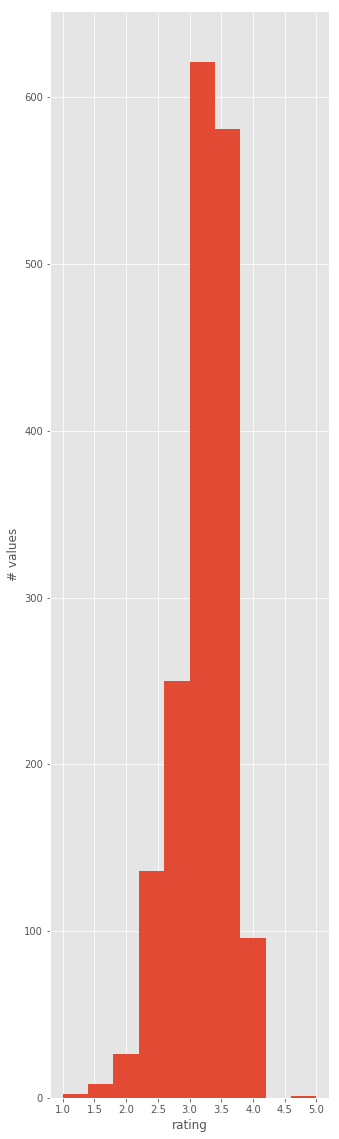

In [249]:
# hay pocos valores anomalos
df['rating'].hist()
plt.xlabel('rating')
plt.ylabel('# values')
plt.show()

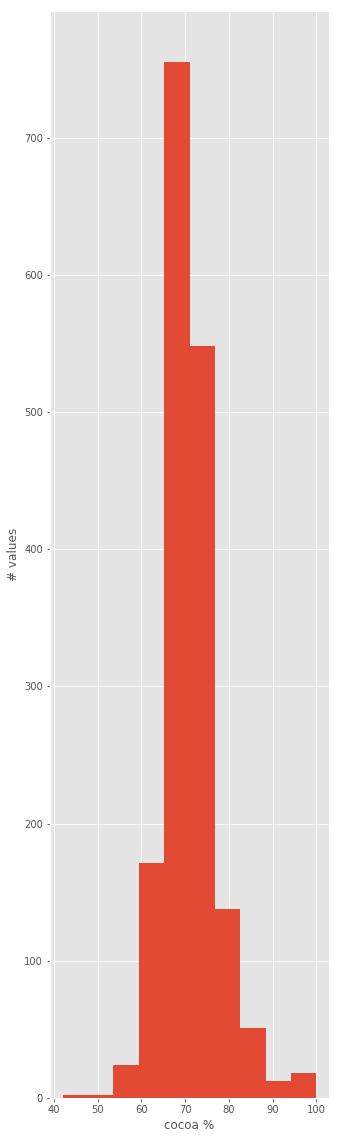

In [250]:
# hay pocos valores anomalos
df['cocoa_percent'].hist()
plt.xlabel('cocoa %')
plt.ylabel('# values')
plt.show()

### Analisis descriptivo

In [251]:
df.head()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
892,kallari (ecuatoriana),diego/ original micro,248,2008,85.0,ecuador,2.50,unknown,ecuador
1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
954,l'amourette,rugoso,1784,2016,80.0,u.s.a.,3.50,trinitario,nicaragua
29,aequare (gianduja),"los rios, quevedo, arriba",370,2009,55.0,ecuador,2.75,forastero (arriba),ecuador
533,devries,costa rica,166,2007,77.0,u.s.a.,3.50,trinitario,costa rica


In [252]:
df.describe()

,ref,review_date,cocoa_percent,rating
count,1721.000000,1721.000000,1721.000000,1721.000000
mean,1052.052876,2012.416618,71.716734,3.196107
std,547.600194,2.875951,6.122141,0.460860
min,5.000000,2006.000000,42.000000,1.000000
25%,607.000000,2010.000000,70.000000,3.000000
50%,1089.000000,2013.000000,70.000000,3.250000
75%,1514.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [253]:
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1721,1721,1721,1721,1721
unique,409,981,60,41,82
top,soma,madagascar,u.s.a.,unknown,venezuela
freq,46,56,737,837,226


In [254]:
# las 5 empresas mas productoras
df['maker'].value_counts().head()

soma        46
fresco      26
bonnat      26
pralus      25
a. morin    23
Name: maker, dtype: int64

In [255]:
# se puede ver una alta correlacion entre la ref y el review date
# para las demas variables las correlaciones son bajas
# la mas alta para cocoa_percent es el rating, entre mas cocoa el rating comienza a disminuir
df.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985266,0.038406,0.080073
review_date,0.985266,1.000000,0.040437,0.075401
cocoa_percent,0.038406,0.040437,1.000000,-0.146180
rating,0.080073,0.075401,-0.146180,1.000000


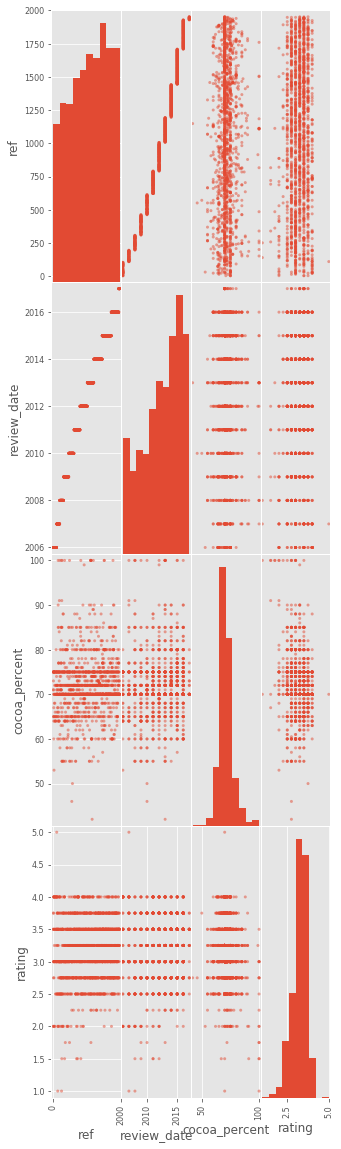

In [256]:
pd.plotting.scatter_matrix(df)
plt.rcParams["figure.figsize"] = [50, 50]
plt.show()

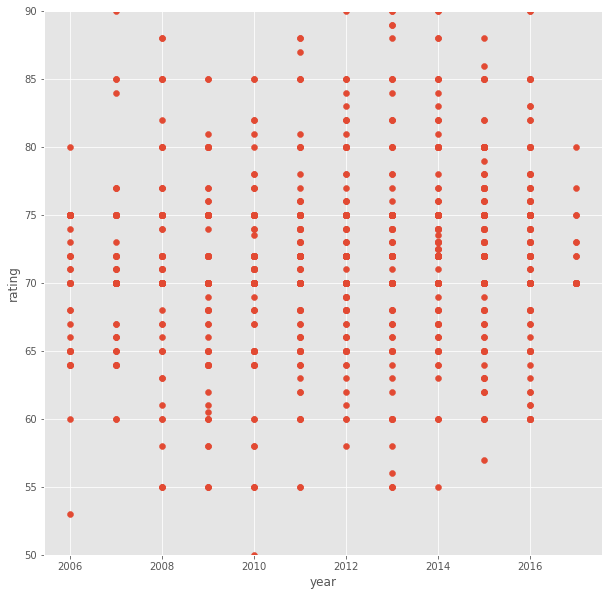

In [257]:
# parece haber una relacion sinoidal entre la fecha de revision y la cantidad de cacao
plt.figure(figsize=(10, 10))
plt.scatter(df['review_date'], df['cocoa_percent'])
plt.ylabel('rating')
plt.xlabel('year')
plt.ylim(50, 90)
#plt.plot(np.sin(df['cocoa_percent']))
plt.show()

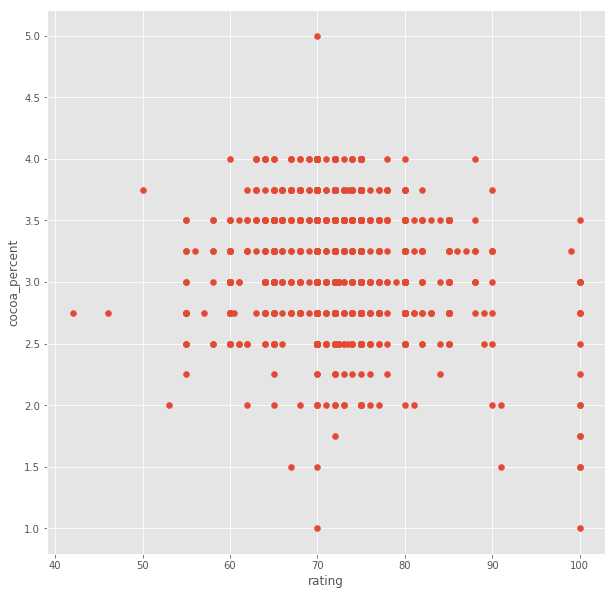

In [258]:
# existe cierta tendencia de que a medida que 
plt.figure(figsize=(10, 10))
plt.scatter(df['cocoa_percent'], df['rating'])
plt.xlabel('rating')
plt.ylabel('cocoa_percent')
plt.show()

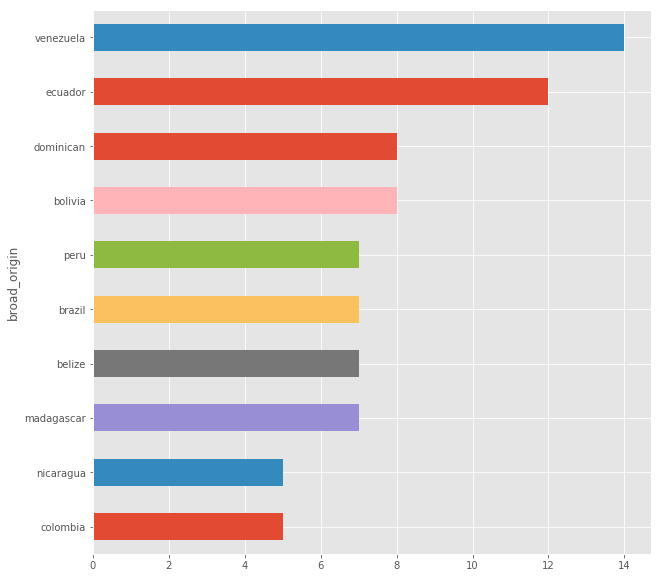

In [259]:
# el pais con mayor variedad de cacao
plt.figure(figsize=(10,10))
df.groupby(["broad_origin"]).nunique()['bean_type'].sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

In [260]:
# los primeros 5 origenes con mejor rating
first_compound_countries = df.groupby(["broad_origin"]).mean()['rating'].sort_values(ascending=False).index[0:5].tolist()
first_compound_countries

['peru, dom. rep',
 'peru, belize',
 'dr, ecuador, peru',
 'png, vanuatu, mad',
 'south america']

In [261]:
first_countries = set(np.concatenate([
    np.array(country.split(','))
    for country in first_compound_countries
]))
list(first_countries)

['south america',
 ' peru',
 'peru',
 ' belize',
 ' vanuatu',
 'png',
 'dr',
 ' ecuador',
 ' dom. rep',
 ' mad']

In [262]:
# we can say that in general south america produces the highest ranking chocolate
for country in first_countries:
    print(country, df[df["broad_origin"] == country.strip()]['rating'].mean())

south america 3.6666666666666665
 peru 3.1378787878787877
peru 3.1378787878787877
 belize 3.2346938775510203
 vanuatu 3.25
png nan
dr nan
 ecuador 3.134715025906736
 dom. rep nan
 mad nan


In [263]:
# el fabricante con mayor variedad de cacao
df.groupby(["maker"]).nunique()['bean_type'].sort_values(ascending=False).index[:3] 

Index(['soma', 'coppeneur', 'domori'], dtype='object', name='maker')

In [264]:
# soma es una empresa canadiense que obtiene cacao de diversas fuentes del mundo pero especificamente sudamerica
df[df['maker'] == 'soma'][['broad_origin', 'company_location']]['broad_origin'].unique()

array(['dominican', 'mad., java, png', 'indonesia', 'peru', 'ecuador',
       'jamaica', 'venezuela', 'papua new guinea', 'bolivia', 'vanuatu',
       'nicaragua', 'madagascar', 'grenada', 'ghana', 'vietnam',
       'trinidad', 'guatemala', 'brazil', 'hawaii',
       'madagascar & ecuador', 'haiti', 'peru, dom. rep',
       'dr, ecuador, peru'], dtype=object)

In [265]:
# el fabricante con mejor rating promedio
df.groupby(["maker"]).nunique()['rating'].sort_values(ascending=False).index[:5] 

Index(['pacari', 'artisan du chocolat', 'bonnat', 'castronovo', 'valrhona'], dtype='object', name='maker')

In [266]:
# pacari es una empresa ecuatoriana que obtiene cacao de diversas fuentes del mundo pero especificamente sudamerica
df[df['maker'] == 'pacari'][['broad_origin', 'company_location']]

,broad_origin,company_location
1252,ecuador,ecuador
1245,ecuador,ecuador
1251,ecuador,ecuador
1246,peru,ecuador
1250,ecuador,ecuador
1240,colombia,ecuador
1244,ecuador,ecuador
1247,ecuador,ecuador
1242,ecuador,ecuador
1241,ecuador,ecuador


In [267]:
# obtiene el cacao de sudamerica
df[df['maker'] == 'pacari'][['broad_origin', 'company_location']]['broad_origin'].unique()

array(['ecuador', 'peru', 'colombia'], dtype=object)

In [268]:
ratings_in_time = df.groupby('review_date').mean()['rating']
ratings_in_time

review_date
2006    3.271930
2007    3.202899
2008    2.980556
2009    3.070796
2010    3.160550
2011    3.256369
2012    3.196809
2013    3.193370
2014    3.198312
2015    3.244662
2016    3.226744
2017    3.312500
Name: rating, dtype: float64

In [269]:
ratings = ratings_in_time.values
years = ratings_in_time.index

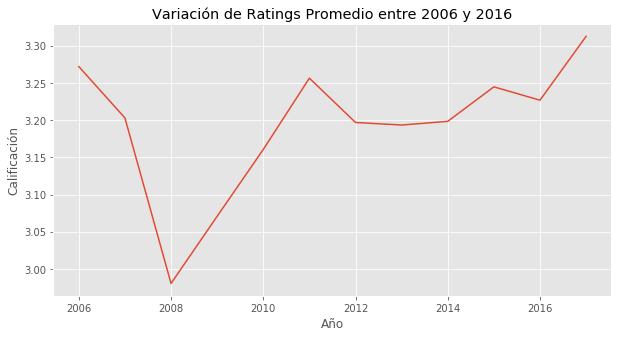

In [270]:
# en general losr atings de los chocolates se han mantenido entre 3 y 3.30
plt.figure(figsize=(10, 5))
plt.title('Variación de Ratings Promedio entre 2006 y 2016')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.plot(years, ratings)
plt.show()

In [286]:
best_ratings_time = df.loc[df['maker'].isin(['pacari','artisan du chocolat', 'bonnat'])].groupby(['maker', 'review_date']).mean()['rating']
best_ratings_time = best_ratings_time.reset_index()
best_ratings_time

,maker,review_date,rating
0,artisan du chocolat,2008,3.750000
1,artisan du chocolat,2009,2.708333
2,artisan du chocolat,2010,3.100000
3,artisan du chocolat,2011,3.375000
4,artisan du chocolat,2012,3.750000
5,artisan du chocolat,2013,3.250000
6,bonnat,2006,3.791667
7,bonnat,2007,2.500000
8,bonnat,2008,4.000000
9,bonnat,2009,2.937500


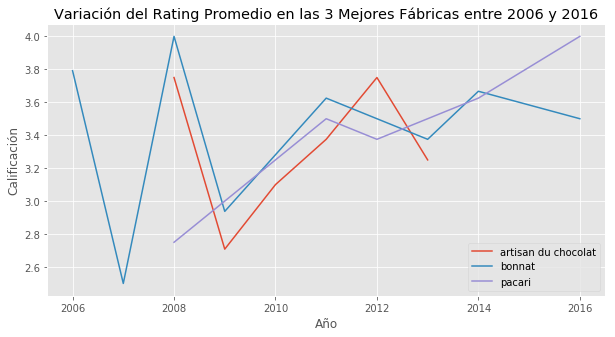

In [293]:
# al rededor del 2009 las 3 fabricas tenian un nivel bajo de rating
plt.xlabel('year')
#best_ratings_time.index.name = 'Año'
best_ratings_time.set_index('review_date', inplace=True)
ax = best_ratings_time.groupby('maker')['rating'].plot(legend=True, figsize=(10,5), sharex=True)
plt.title('Variación del Rating Promedio en las 3 Mejores Fábricas entre 2006 y 2016')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.show()

In [273]:
df.loc[df['maker'].isin(['pacari','artisan du chocolat', 'bonnat'])].groupby(['maker', 'review_date'])['broad_origin'].unique().reset_index()

,maker,review_date,broad_origin
0,artisan du chocolat,2008,[congo]
1,artisan du chocolat,2009,"[madagascar, indonesia, venezuela, dominican, ..."
2,artisan du chocolat,2010,"[vietnam, venezuela, indonesia, costa rica, ja..."
3,artisan du chocolat,2011,"[haiti, panama]"
4,artisan du chocolat,2012,[colombia]
5,artisan du chocolat,2013,[trinidad]
6,bonnat,2006,"[venezuela, carribean, madagascar, sri lanka]"
7,bonnat,2007,[ecuador]
8,bonnat,2008,[venezuela]
9,bonnat,2009,"[ivory coast, mexico, peru]"


In [274]:
best_ratings_borigin = df.loc[
    df['maker'].isin(['pacari','artisan du chocolat', 'bonnat'])
].groupby(['maker', 'review_date'])['broad_origin'].nunique().reset_index()
best_ratings_borigin

,maker,review_date,broad_origin
0,artisan du chocolat,2008,1
1,artisan du chocolat,2009,6
2,artisan du chocolat,2010,5
3,artisan du chocolat,2011,2
4,artisan du chocolat,2012,1
5,artisan du chocolat,2013,1
6,bonnat,2006,4
7,bonnat,2007,1
8,bonnat,2008,1
9,bonnat,2009,3


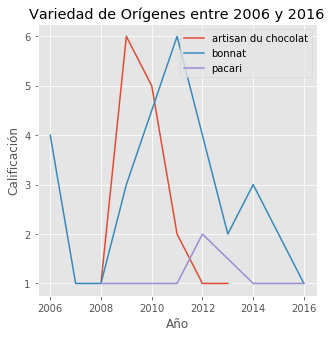

In [294]:
# al rededor del 2009 las 3 fabricas tenian un nivel bajo de rating
plt.xlabel('year')
best_ratings_borigin.set_index('review_date', inplace=True)
ax = best_ratings_borigin.groupby('maker')['broad_origin'].plot(legend=True, figsize=(5,5))
plt.title('Variedad de Orígenes entre 2006 y 2016')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.show()

In [276]:
# restamos 1 por el tipo unknown
best_ratings_variety = df.loc[df['maker'].isin(['pacari','artisan du chocolat', 'bonnat'])].groupby(['maker', 'review_date'])['bean_type'].nunique().apply(lambda x: x - 1)#.sort_values(ascending=False)
best_ratings_variety

maker                review_date
artisan du chocolat  2008           0
                     2009           3
                     2010           1
                     2011           0
                     2012           0
                     2013           0
bonnat               2006           2
                     2007           0
                     2008           0
                     2009           1
                     2011           3
                     2013           0
                     2014           0
                     2016           0
pacari               2008           0
                     2011           0
                     2012           0
                     2014           0
                     2016           0
Name: bean_type, dtype: int64

In [305]:
ratings_origin = df.groupby(['maker', 'rating', 'cocoa_percent'])['specific_origin', 'broad_origin'].nunique().apply(lambda x : x-1)
ratings_origin.reset_index(inplace=True)
ratings_origin

,maker,rating,cocoa_percent,specific_origin,broad_origin
0,a. morin,2.75,70.0,3,3
1,a. morin,3.00,70.0,2,2
2,a. morin,3.25,70.0,2,2
3,a. morin,3.50,70.0,5,4
4,a. morin,3.75,63.0,1,1
5,a. morin,3.75,70.0,1,1
6,a. morin,4.00,63.0,0,0
7,a. morin,4.00,70.0,1,1
8,acalli,3.75,70.0,1,0
9,adi,2.75,60.0,0,0


In [306]:
ratings_origin.corr()

,rating,cocoa_percent,specific_origin,broad_origin
rating,1.000000,-0.154498,0.129424,0.110038
cocoa_percent,-0.154498,1.000000,-0.052352,-0.052088
specific_origin,0.129424,-0.052352,1.000000,0.939831
broad_origin,0.110038,-0.052088,0.939831,1.000000


In [309]:
ratings_origin.groupby('maker').agg(
    {'specific_origin':['sum', 'max'],
     'rating':['mean', 'var', 'max', 'min'], 
     'cocoa_percent': lambda x: x.max() - x.min()
    }
)

specific_origin        rating            \
                                             sum max      mean       var   
maker                                                                      
a. morin                                      15   5  3.500000  0.214286   
acalli                                         1   1  3.750000       NaN   
adi                                            0   0  3.250000  0.125000   
aequare (gianduja)                             0   0  2.875000  0.031250   
ah cacao                                       0   0  3.000000       NaN   
akesson's (pralus)                             1   1  3.250000  0.500000   
alain ducasse                                  1   1  2.750000  0.041667   
alexandre                                      3   3  3.500000       NaN   
altus aka cao artisan                          5   2  2.950000  0.106250   
amano                                          4   2  3.400000  0.268750   
amatller (simon coll)                          0   0  2.875000  0.020833   
amazona                                        0   0  3.375000  0.031250   
ambrosia                                       0   0  3.250000  0.025000   
amedei                                         4   1  3.850000  0.550000   
amma                                           0   0  3.500000  0.250000   
anahata                                        0   0  3.000000       NaN   
animas                                         0   0  3.500000       NaN   
ara                                            1   1  2.750000  0.062500   
arete                                         13   4  3.444444  0.121528   
artisan du chocolat                            6   3  2.925000  0.584028   
artisan du chocolat (casa luker)               0   0  2.750000       NaN   
askinosie                                      0   0  3.416667  0.291667   
bahen & co.                                    0   0  3.000000  0.250000   
bakau                                          0   0  3.125000  0.281250   
bar au chocolat                                1   1  3.625000  0.104167   
baravelli's                                    0   0  2.750000       NaN   
batch                                          0   0  3.500000  0.062500   
beau cacao                                     0   0  3.125000  0.031250   
beehive                                        1   1  2.750000  0.000000   
belcolade                                      2   2  3.125000  0.281250   
...                                          ...  ..       ...       ...   
treehouse                                      0   0  3.000000       NaN   
tsara (cinagra)                                0   0  3.500000       NaN   
twenty-four blackbirds                         1   1  2.950000  0.168750   
two ravens                                     0   0  3.000000       NaN   
un dimanche a paris                            0   0  3.750000       NaN   
undone                                         0   0  2.875000  0.031250   
upchurch                                       0   0  3.125000  0.031250   
urzi                                           0   0  3.250000       NaN   
valrhona                                       2   1  3.390625  0.291406   
vanleer (barry callebaut)                      0   0  2.625000  0.031250   
vao vao (chocolaterie robert)                  0   0  2.916667  0.041667   
vicuna                                         1   1  3.250000       NaN   
videri                                         1   1  3.437500  0.057292   
vietcacao (a. morin)                           0   0  3.500000       NaN   
vintage plantations                            0   0  3.000000       NaN   
vintage plantations (tulicorp)                 0   0  2.500000  0.333333   
violet sky                                     2   1  3.000000  0.062500   
vivra                                          1   1  2.750000  0.125000   
wellington chocolate factory                   1   1  3.500000       NaN   
whitt

In [355]:
df[df['review_date'] == 2006].nlargest(20, 'rating')

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
243,bonnat,"maracaibo, el rosario",48,2006,75.0,france,4.00,criollo,venezuela
1117,michel cluizel,los ancones p.,24,2006,67.0,france,4.00,unknown,dominican
649,felchlin,"alto beni, cru savage",56,2006,68.0,switzerland,4.00,criollo (wild),bolivia
247,bonnat,chuao,81,2006,75.0,france,4.00,trinitario,venezuela
244,bonnat,madagascar,75,2006,75.0,france,4.00,trinitario,madagascar
1119,michel cluizel,maralumi p.,24,2006,64.0,france,4.00,unknown,papua new guinea
242,bonnat,"ocumare, puerto cabello",32,2006,75.0,france,4.00,unknown,venezuela
1330,pralus,jamaique,32,2006,75.0,france,4.00,trinitario,jamaica
1118,michel cluizel,mangaro p.,24,2006,65.0,france,4.00,trinitario,madagascar


In [378]:
maker_rating_mean = df.groupby(['review_date', 'maker'])['rating'].mean().reset_index()
maker_rating_mean

,review_date,maker,rating
0,2006,bonnat,3.791667
1,2006,domori,3.250000
2,2006,el rey,2.750000
3,2006,felchlin,3.300000
4,2006,guittard,3.125000
5,2006,jacque torres,2.000000
6,2006,michel cluizel,3.750000
7,2006,neuhaus (callebaut),2.583333
8,2006,original hawaiin chocolate factory,3.000000
9,2006,pierre marcolini,3.666667


In [481]:
best_maker_indexes = maker_rating_mean.groupby(['review_date'])['rating'].nlargest(5).reset_index()['level_1'].values#, 'rating')
best_makers_year = maker_rating_mean.iloc[best_maker_indexes]
best_makers_year

,review_date,maker,rating
0,2006,bonnat,3.791667
6,2006,michel cluizel,3.750000
9,2006,pierre marcolini,3.666667
10,2006,pralus,3.406250
3,2006,felchlin,3.300000
28,2007,patric,4.000000
30,2007,pralus,4.000000
29,2007,pierre marcolini,3.812500
15,2007,amedei,3.718750
24,2007,domori,3.656250


In [539]:
# agrupamos por segmentos en base al rating, pudimos haber usado un algoritmo de clustering pero esto sera suficiente
makers = {str(i) : df[(df['rating'] >= i) & (df['rating'] < i + 1)].sort_values('rating') for i in range(1,6)}

In [540]:
# el mejor de toda la muestra
makers['5']

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
78,amedei,chuao,111,2007,70.0,italy,5.0,trinitario,venezuela


In [541]:
# los peores de toda la muestra
makers['1']

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
437,claudio corallo,principe,252,2008,100.0,sao tome,1.00,forastero,sao tome & principe
326,callebaut,baking,141,2007,70.0,belgium,1.00,unknown,ecuador
988,machu picchu trading co.,peru,721,2011,70.0,peru,1.50,unknown,peru
324,cacaoyere (ecuatoriana),pichincha,259,2008,91.0,ecuador,1.50,forastero (arriba),ecuador
249,bouga cacao (tulicorp),"el oro, hacienda de oro",341,2009,100.0,ecuador,1.50,forastero (arriba),ecuador
1492,snake & butterfly,ghana,693,2011,67.0,u.s.a.,1.50,forastero,ghana
449,coppeneur,ecuador puristique,817,2012,100.0,germany,1.50,unknown,ecuador
125,artisan du chocolat,venezuela,486,2010,100.0,u.k.,1.75,unknown,venezuela
828,hotel chocolat,"island growers, 2012, 120hr c.",1113,2013,100.0,u.k.,1.75,trinitario,st lucia
132,artisan du chocolat,brazil rio doce,363,2009,72.0,u.k.,1.75,unknown,brazil


In [548]:
cocoa_rating = [(str(i), makers[str(i)]['cocoa_percent'].mean()) for i in range(1, 6)]
cocoa_rating

[('1', 87.0),
 ('2', 72.42718446601941),
 ('3', 71.41971713810317),
 ('4', 70.8125),
 ('5', 70.0)]

In [553]:
df_percent = pd.DataFrame(cocoa_rating, columns=['rating', 'cocoa_percent'])#.plot(x='', kind='bar', figsize=(5, 5))
df_percent

,rating,cocoa_percent
0,1,87.000000
1,2,72.427184
2,3,71.419717
3,4,70.812500
4,5,70.000000


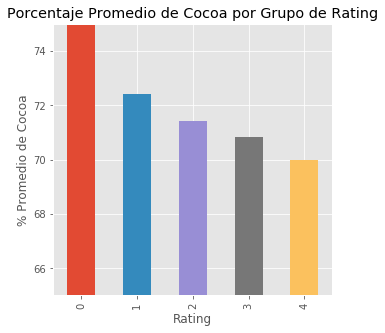

In [572]:
# se ve como a medida que baja el % de cocoa el rating mejora 
df_percent['cocoa_percent'].plot.bar(figsize=(5, 5))
plt.title('Porcentaje Promedio de Cocoa por Grupo de Rating')
plt.xlabel('Rating')
plt.ylabel('% Promedio de Cocoa')
plt.ylim(65, 75);

In [581]:
maker_stats_info = [(str(i), makers[str(i)]['maker'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in stats_info];

('1', count                      10
unique                      9
top       artisan du chocolat
freq                        2
Name: maker, dtype: object) 



('2', count                            412
unique                           234
top       hotel chocolat (coppeneur)
freq                               7
Name: maker, dtype: object) 



('3', count     1202
unique     341
top       soma
freq        34
Name: maker, dtype: object) 



('4', count       96
unique      45
top       soma
freq        10
Name: maker, dtype: object) 



('5', count          1
unique         1
top       amedei
freq           1
Name: maker, dtype: object) 





In [584]:
sorigin_stats_info = [(str(i), makers[str(i)]['specific_origin'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in sorigin_stats_info];

('1', count                                 10
unique                                10
top       island growers, 2012, 120hr c.
freq                                   1
Name: specific_origin, dtype: object) 



('2', count      412
unique     272
top       peru
freq        21
Name: specific_origin, dtype: object) 



('3', count           1202
unique           735
top       madagascar
freq              42
Name: specific_origin, dtype: object) 



('4', count             96
unique            85
top       madagascar
freq               5
Name: specific_origin, dtype: object) 



('5', count         1
unique        1
top       chuao
freq          1
Name: specific_origin, dtype: object) 





In [587]:
ryear_stats_info = [(str(i), makers[str(i)]['review_date'].mode()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in ryear_stats_info];

('1', 0    2008
1    2009
2    2011
dtype: int64) 



('2', 0    2014
dtype: int64) 



('3', 0    2015
dtype: int64) 



('4', 0    2011
dtype: int64) 



('5', 0    2007
dtype: int64) 





In [588]:
cpercent_stats_info = [(str(i), makers[str(i)]['cocoa_percent'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in cpercent_stats_info];

('1', count     10.000000
mean      87.000000
std       15.143756
min       67.000000
25%       70.500000
50%       95.500000
75%      100.000000
max      100.000000
Name: cocoa_percent, dtype: float64) 



('2', count    412.000000
mean      72.427184
std        7.529797
min       42.000000
25%       70.000000
50%       72.000000
75%       75.000000
max      100.000000
Name: cocoa_percent, dtype: float64) 



('3', count    1202.000000
mean       71.419717
std         5.394357
min        50.000000
25%        70.000000
50%        70.000000
75%        74.000000
max       100.000000
Name: cocoa_percent, dtype: float64) 



('4', count    96.000000
mean     70.812500
std       3.867033
min      60.000000
25%      70.000000
50%      70.000000
75%      72.250000
max      88.000000
Name: cocoa_percent, dtype: float64) 



('5', count     1.0
mean     70.0
std       NaN
min      70.0
25%      70.0
50%      70.0
75%      70.0
max      70.0
Name: cocoa_percent, dtype: float64) 





In [589]:
clocation_stats_info = [(str(i), makers[str(i)]['company_location'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in clocation_stats_info];

('1', count       10
unique       7
top       u.k.
freq         3
Name: company_location, dtype: object) 



('2', count        412
unique        47
top       u.s.a.
freq         196
Name: company_location, dtype: object) 



('3', count       1202
unique        53
top       u.s.a.
freq         515
Name: company_location, dtype: object) 



('4', count         96
unique        17
top       u.s.a.
freq          25
Name: company_location, dtype: object) 



('5', count         1
unique        1
top       italy
freq          1
Name: company_location, dtype: object) 





In [597]:
btype_stats_info = [(str(i), makers[str(i)]['bean_type'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in btype_stats_info];

('1', count          10
unique          4
top       unknown
freq            5
Name: bean_type, dtype: object) 



('2', count         412
unique         14
top       unknown
freq          228
Name: bean_type, dtype: object) 



('3', count        1202
unique         39
top       unknown
freq          571
Name: bean_type, dtype: object) 



('4', count          96
unique         15
top       unknown
freq           33
Name: bean_type, dtype: object) 



('5', count              1
unique             1
top       trinitario
freq               1
Name: bean_type, dtype: object) 





In [592]:
borigin_stats_info = [(str(i), makers[str(i)]['broad_origin'].describe()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in borigin_stats_info];

('1', count          10
unique          7
top       ecuador
freq            4
Name: broad_origin, dtype: object) 



('2', count      412
unique      54
top       peru
freq        53
Name: broad_origin, dtype: object) 



('3', count          1202
unique           73
top       venezuela
freq            153
Name: broad_origin, dtype: object) 



('4', count            96
unique           26
top       venezuela
freq             22
Name: broad_origin, dtype: object) 



('5', count             1
unique            1
top       venezuela
freq              1
Name: broad_origin, dtype: object) 





In [593]:
borigin_stats_info = [(str(i), makers[str(i)]['broad_origin'].nunique()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in borigin_stats_info];

('1', 7) 



('2', 54) 



('3', 73) 



('4', 26) 



('5', 1) 





In [605]:
df_origin = pd.DataFrame(borigin_stats_info, columns=['rating', 'origin'])#.plot(x='', kind='bar', figsize=(5, 5))
df_origin

,rating,origin
0,1,7
1,2,54
2,3,73
3,4,26
4,5,1


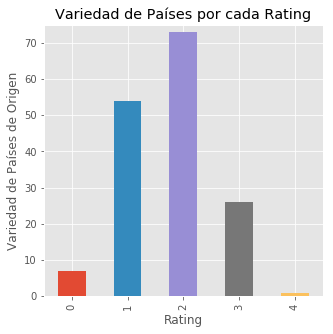

In [609]:
# se ve como a medida que baja el % de cocoa el rating mejora 
df_origin['origin'].plot.bar(figsize=(5, 5))
plt.title('Variedad de Países por cada Rating')
plt.xlabel('Rating')
plt.ylabel('Variedad de Países de Origen')
plt.ylim(0, 75);

In [594]:
# correlacionado a lo anterior esta el origen especifico
sorigin_stats_info = [(str(i), makers[str(i)]['specific_origin'].nunique()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in sorigin_stats_info];

('1', 10) 



('2', 272) 



('3', 735) 



('4', 85) 



('5', 1) 





In [610]:
df_sorigin = pd.DataFrame(sorigin_stats_info, columns=['rating', 'sorigin'])

,rating,sorigin
0,1,10
1,2,272
2,3,735
3,4,85
4,5,1


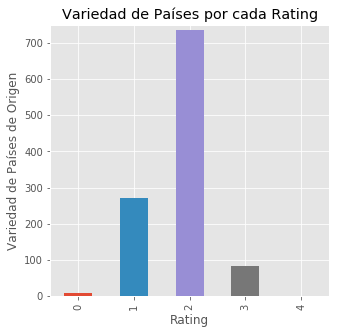

In [617]:
# se ve como a medida que baja el % de cocoa el rating mejora 
df_sorigin['sorigin'].plot.bar(figsize=(5, 5))
plt.title('Variedad de Países por cada Rating')
plt.xlabel('Rating')
plt.ylabel('Variedad de Países de Origen')
plt.ylim(0, 750);

In [618]:
df.to_csv('cocoa_ratings_clean.csv')

In [279]:
# porcentages de las diferencias

In [280]:

# checar think stats
# entender cada variable
# limpieza
# caracteristicas del dataset
# outliers
# distribuciones
# http://flavorsofcacao.com/chocolate_database.html
